# Lending Club Case Study
### by Ayush and Nivedita

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_df.shape

(39717, 111)

- Observation: There are 39k+ rows and 100+ columns

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Observation 
- There seem to be columns which have most values missing
- These can be dropped

---

## Feature Extraction
- We will choose the required columns for anlysis and drop the rest
- We will also drop columns with more than 90% missing values

### Null Value Analysis
- Choosing between imputing or dropping values based on threshold

In [7]:
# ?loan_df.dropna

#### Columns - Null Value Analysis

##### Dropping columns where all values are missing

In [8]:
loan_df.dropna(how='all', axis=1, inplace=True)

In [9]:
loan_df.shape

(39717, 57)

In [10]:
df_checkpoint = loan_df.copy()

In [11]:
loan_df.shape

(39717, 57)

##### Dropping columns which only have one type of value
- they won't provide any relevants insights (they have only value throughout the column)

In [12]:
for col in loan_df.columns:
    if len(loan_df[col].unique()) == 1:
        print("dropping:", col, "which contained:", loan_df[col].unique(), 'as the only value')
        loan_df.drop(col, inplace=True, axis=1)

dropping: pymnt_plan which contained: ['n'] as the only value
dropping: initial_list_status which contained: ['f'] as the only value
dropping: policy_code which contained: [1] as the only value
dropping: application_type which contained: ['INDIVIDUAL'] as the only value
dropping: acc_now_delinq which contained: [0] as the only value
dropping: delinq_amnt which contained: [0] as the only value


In [13]:
loan_df.shape

(39717, 51)

In [14]:
col_checkpoint = loan_df.copy()

In [15]:
loan_df.shape

(39717, 51)

##### Checking percentage of missing values in all columns

In [16]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)

In [17]:
# list of columns which have missing values
miss_percentage.loc[miss_percentage > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### Observation: We can see that there are 2 columns with more than 90% missing values and one column with more than 60% missing values.

- First, we remove the columns with more than 90% missing values

In [18]:
loan_df.drop(list(miss_percentage[miss_percentage >= 90].index), axis=1, inplace=True)

- Next, we check what kind of values does mths_since_last_delinq has.

In [19]:
loan_df.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [20]:
loan_df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
115.0      1
106.0      1
95.0       1
120.0      1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

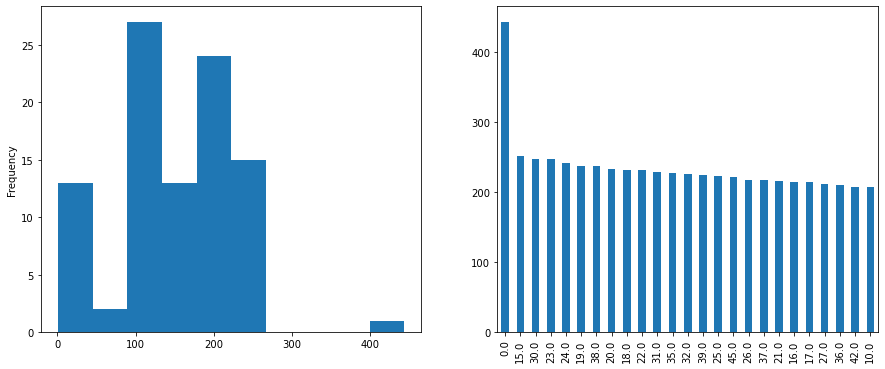

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

loan_df.mths_since_last_delinq.value_counts().plot(kind='hist', ax=ax1)
loan_df.mths_since_last_delinq.value_counts()[0:10].plot(kind='bar', ax=ax2)

plt.show()

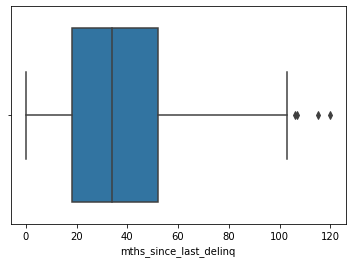

In [22]:
sns.boxplot(x='mths_since_last_delinq', data=loan_df)
plt.show()

#### Note:

This column lets us know the number of months since the borrower's last delinquency.  
Since this is an important metric for loan application, we will be keeping this value.  
However, we are not be imputing the values in this phase. We will do so later if required

In [23]:
loan_df.shape

(39717, 49)

###### Observation: about 55% of the columns had no relevant information, and have beend dropped

---

#### Rows - Null Value Analysis

In [24]:
loan_df.dropna(how='all', axis=0).shape

(39717, 49)

##### Observation: There are no rows where all values are missing

In [25]:
loan_df.dropna().shape

(8238, 49)

In [26]:
len(loan_df[loan_df.isnull().sum(axis=1) <= 3])

39381

##### Observation: There are no rows with more than 3 missing values, hence no rows need to be dropped

---

### Feature Extraction
- We will analyze the columns and description and decide whether they are relevant for our analysis or not

In [27]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Dropping customer behavior columns which are not present at the time of loan application

In [28]:
all_cust_behav_col = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']
loan_df.drop(all_cust_behav_col, axis=1, inplace=True)

##### After analyzing the column description we have decided to drop some columns

| Column          | Reason                                |
|-----------------|---------------------------------------|
| member_id       | similar to id                         |
| funded_amnt     | Data Unavailable when loan is applied |
| funded_amnt_inv | Data Unavailable when loan is applied |
| url             | not required for analysis             |
| desc            | not important for reducing risk       |
| title           | similar to purpose                    |


In [29]:
loan_df.drop(['member_id', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title'], axis=1, inplace=True)

In [30]:
loan_df.shape

(39717, 23)

In [31]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### For the analysis, there is no particular relevance of the `id` column, hence dropping it

In [32]:
loan_df.drop(['id'], axis=1, inplace=True)

##### Looking closely at the data, some of the columns are filled with one value or NaN, so we will drop these as well

In [33]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [34]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [35]:
loan_df.tax_liens.unique()

array([ 0., nan])

In [36]:
loan_df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [37]:
loan_df.shape

(39717, 19)

###### Observation: ~17% columns remain after feature selection

##### As a final step we check for correlation between the numeric columns

In [38]:
loan_df.corr()

,loan_amnt,installment,annual_inc,dti,mths_since_last_delinq,pub_rec_bankruptcies
loan_amnt,1.000000,0.930288,0.271149,0.066439,0.014871,-0.037180
installment,0.930288,1.000000,0.270874,0.054186,0.000047,-0.034103
annual_inc,0.271149,0.270874,1.000000,-0.122732,-0.008822,-0.016801
dti,0.066439,0.054186,-0.122732,1.000000,0.068815,0.005691
mths_since_last_delinq,0.014871,0.000047,-0.008822,0.068815,1.000000,0.025841
pub_rec_bankruptcies,-0.037180,-0.034103,-0.016801,0.005691,0.025841,1.000000


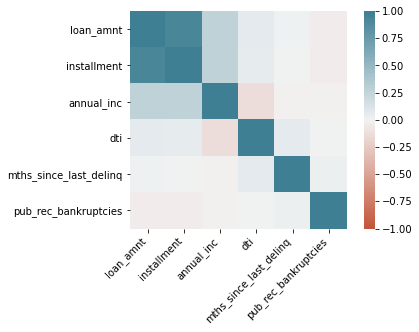

In [39]:
ax = sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Observation: 
- Installament and Loan Amount are positively correlated (strong)
- dti and annual income are negatively correlated (weak)

In [40]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,38.0,0.0


In [41]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [42]:
loan_df[loan_df.loan_status == 'Current'].shape

(1140, 19)

##### Note: We know that loan applications whose loan_status is Current are not relevant as these applicants cannot be classified as defaulters / non-defaulters as of now and hence these rows can be dropped

In [43]:
loan_df = loan_df[~(loan_df.loan_status == 'Current')]

In [44]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,0.0


In [45]:
loan_df.shape

(38577, 19)

###### Observation: Approximately 2.8% rows have been dropped from the data set

---

### Imputing Missing Values

In [97]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df)), 2)

##### The following columns have missing values which can be imputed

In [98]:
miss_percentage.loc[miss_percentage > 0].index.to_list()

['emp_title', 'mths_since_last_delinq']

In [99]:
miss_percentage.loc[miss_percentage > 0]

emp_title                  6.19
mths_since_last_delinq    64.56
dtype: float64

#### Employee Title

In [100]:
loan_df.emp_title.value_counts()

US Army               131
Bank of America       107
IBM                    65
AT&T                   57
Kaiser Permanente      56
                     ... 
AmGen                   1
LOWE'S                  1
Mason City Schools      1
Forever Blossoms        1
HighRoads, Inc          1
Name: emp_title, Length: 28027, dtype: int64

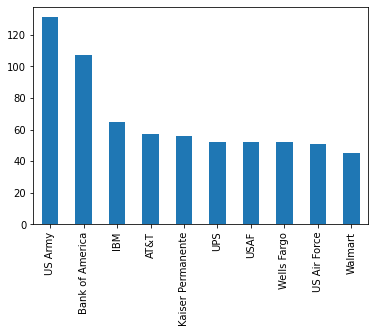

In [101]:
loan_df.emp_title.value_counts()[0:10].plot(kind='bar')
plt.show()

In [102]:
loan_df.emp_title.mode()

0    US Army
dtype: object

##### Note: Dropping emp_title
6% of the data (~1800 entries) is missing in emp_title, however, the most frequenty occuring emp_title (US Army) is ~0.44% (134 entries), hence filling this column with mode will skew the data.   
Moreover, many of the emp_titles are in small numbers, so it may not be fruitful to analyze this column.

In [103]:
loan_df.drop(['emp_title'], axis=1, inplace=True)

In [104]:
loan_df.shape

(38577, 20)

---

#### Employee Length (length of employment)

In [47]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### Normalizing Employee Length
- Remove years
- Remove year
- Replace < 1 with 0
- Replace 10+ with 10
- convert to numeric data

In [48]:
def clean_up(x):
    str_x = str(x)
    if str(x) == 'nan':
        return x
    else:
        normalized = str_x.replace('years', '').replace('year', '').replace('< 1', '0').replace('10+', '10')
        return int(normalized)

In [49]:
loan_df.emp_length = loan_df.emp_length.apply(clean_up)

In [50]:
loan_df.emp_length.value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [51]:
100*loan_df.emp_length.value_counts()/sum(loan_df.emp_length.value_counts())

10.0    22.608140
0.0     12.007245
2.0     11.429256
3.0     10.686128
4.0      8.901556
5.0      8.507351
1.0      8.440763
6.0      5.774558
7.0      4.557319
8.0      3.822182
9.0      3.265502
Name: emp_length, dtype: float64

In [52]:
loan_df.emp_length.isnull().sum()

1033

In [53]:
loan_df.emp_length.describe()

count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

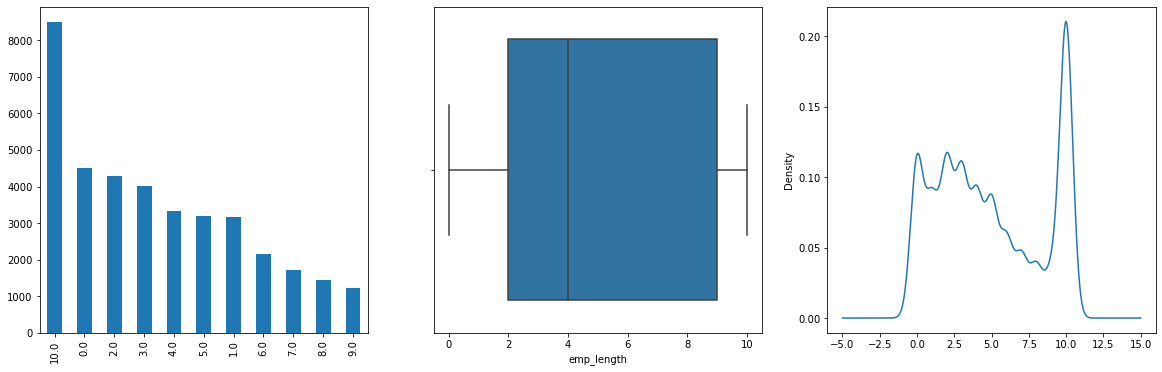

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

loan_df.emp_length.value_counts().plot(kind='bar', ax=ax1)
sns.boxplot(x='emp_length', data=loan_df, ax=ax2)
# sns.kdeplot(x='emp_length', data=loan_df, ax=ax3)
loan_df.emp_length.plot(kind='kde', ax=ax3)

plt.show()

##### Imputing null values of emp_length with mode
- Looking at the plots, it is more likely that the missing values will be filled with 10 (mode)
- This was originally categorical data, which is usually filled with mode

In [55]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace=True)

In [56]:
loan_df.emp_length.isnull().sum()

0

In [57]:
loan_df.emp_length.value_counts()

10.0    9521
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

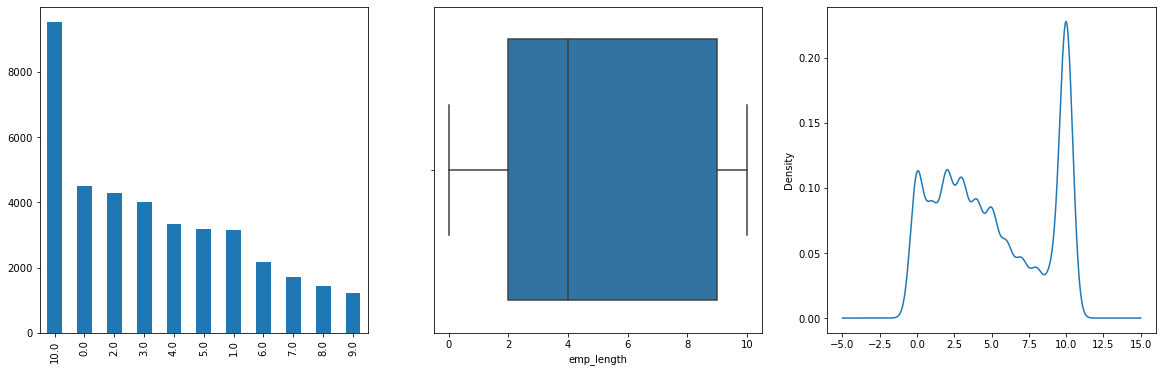

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

loan_df.emp_length.value_counts().plot(kind='bar', ax=ax1)
sns.boxplot(x='emp_length', data=loan_df, ax=ax2)
# sns.kdeplot(x='emp_length', data=loan_df, ax=ax3)
loan_df.emp_length.plot(kind='kde', ax=ax3)

plt.show()

---

#### Public Bankruptcies

In [59]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [60]:
loan_df.pub_rec_bankruptcies.isnull().sum()

697

##### Imputing the missing values for public bankruptcies with 0 (mode) as out of 38k+ records 36k+ records are filled with 0

In [61]:
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace=True)

In [62]:
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [63]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

---

In [64]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   term                    38577 non-null  object 
 2   int_rate                38577 non-null  object 
 3   installment             38577 non-null  float64
 4   grade                   38577 non-null  object 
 5   sub_grade               38577 non-null  object 
 6   emp_title               36191 non-null  object 
 7   emp_length              38577 non-null  float64
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  issue_d                 38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  zip_code                38577 non-null

##### Observation: 
- There are total 38577 records in the data
- All null values have been imputed except for mths_since_last_delinq

---


### Derived Columns

#### Converting issue_d column to Date Time format
- this will help in adding month and year columns

In [71]:
loan_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [72]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format="%b-%y")

In [73]:
loan_df['month'] = pd.DatetimeIndex(loan_df.issue_d).month

In [74]:
loan_df['year'] = pd.DatetimeIndex(loan_df.issue_d).year

In [77]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies,month,year
0,5000,36 months,10.65%,162.87,B,B2,NaN,10.0,RENT,24000.0,...,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,NaN,0.0,12,2011
1,2500,60 months,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,...,2011-12-01,Charged Off,car,309xx,GA,1.00,NaN,0.0,12,2011
2,2400,36 months,15.96%,84.33,C,C5,NaN,10.0,RENT,12252.0,...,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,NaN,0.0,12,2011
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,...,2011-12-01,Fully Paid,other,917xx,CA,20.00,35.0,0.0,12,2011
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,...,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,NaN,0.0,12,2011


### Normalizing Data

In [105]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  int64         
 1   term                    38577 non-null  float64       
 2   int_rate                38577 non-null  float64       
 3   installment             38577 non-null  float64       
 4   grade                   38577 non-null  object        
 5   sub_grade               38577 non-null  object        
 6   emp_length              38577 non-null  float64       
 7   home_ownership          38577 non-null  object        
 8   annual_inc              38577 non-null  float64       
 9   verification_status     38577 non-null  object        
 10  issue_d                 38577 non-null  datetime64[ns]
 11  loan_status             38577 non-null  object        
 12  purpose                 38577 non-null  object

#### Let's look at columns which have "object" as dtype (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html))

In [112]:
loan_df.select_dtypes('object')

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state
0,B,B2,RENT,Verified,Fully Paid,credit_card,860xx,AZ
1,C,C4,RENT,Source Verified,Charged Off,car,309xx,GA
2,C,C5,RENT,Not Verified,Fully Paid,small_business,606xx,IL
3,C,C1,RENT,Source Verified,Fully Paid,other,917xx,CA
5,A,A4,RENT,Source Verified,Fully Paid,wedding,852xx,AZ
...,...,...,...,...,...,...,...,...
39712,A,A4,MORTGAGE,Not Verified,Fully Paid,home_improvement,802xx,CO
39713,C,C1,RENT,Not Verified,Fully Paid,credit_card,274xx,NC
39714,A,A4,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,017xx,MA
39715,A,A2,MORTGAGE,Not Verified,Fully Paid,other,208xx,MD


##### term - 36 months / 60 months
- convert to numeric by dropping months

In [81]:
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [86]:
loan_df.term = loan_df.term.apply(lambda x: float(x.replace('months', '')))

In [91]:
loan_df.term.head()

0    36.0
1    60.0
2    36.0
3    36.0
5    36.0
Name: term, dtype: float64

---

##### interest rate
- convert to numeric by dropping percentage

In [92]:
loan_df.int_rate.value_counts().head()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
Name: int_rate, dtype: int64

In [93]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.replace('%', '')))

In [94]:
loan_df.int_rate.value_counts().head()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
Name: int_rate, dtype: int64

---

##### Home Ownersip - Discuss

In [113]:
loan_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

---

##### Verification Status - keep only 2

In [114]:
loan_df.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

---

##### Loan Status - Derive / convert numeric column? (0 for paid / 1 for charged off?)

In [115]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

---

##### Purpose

In [119]:
loan_df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

---

##### Zip Code
- convert to numeric by removing xx

In [121]:
loan_df.zip_code.value_counts().head()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
Name: zip_code, dtype: int64

In [123]:
loan_df.zip_code = loan_df.zip_code.apply(lambda x: float(x.replace('xx', '')))

In [124]:
loan_df.zip_code.value_counts().head()

100.0    583
945.0    531
112.0    502
606.0    493
70.0     455
Name: zip_code, dtype: int64

---

##### State (Address State - US)

In [128]:
loan_df.addr_state.value_counts().head()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
Name: addr_state, dtype: int64

---

##### Grade - convert to numeric for correlation / other analysis?

In [130]:
loan_df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

---

##### Sub Grade - convert to numeric?

In [132]:
loan_df.sub_grade.value_counts().head()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
Name: sub_grade, dtype: int64

###### Observation: Subgrade contains grade information as well

---

## Univariate Analysis
- Perform univariate analysis on each of the columns

# References
- https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
- https://www.w3schools.com/python/python_datetime.asp
- https://www.codegrepper.com/code-examples/python/extract+month+from+datetime+pandas
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html